In [1]:
import sys
print(sys.executable)

!{sys.executable} -m pip install keras

/bin/python
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


实战(一):建立MLP实现非线性二分类
任务:基于data.csv数据，建立mlp模型，计算其在测试数据上的准确率，可视化模型预测结果:

进行数据分离:
test size=0.33,random state=10
模型结构:一层隐藏层，有20个神经元

In [3]:
#load data
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data.head()


,x1,x2,y
0,-1.254599,-3.148671,1
1,4.507143,0.419009,0
2,2.319939,3.729458,0
3,0.986585,2.322249,1
4,-3.439814,3.065611,0


In [4]:
x = data.drop('y', axis=1)
y = data.loc[:, 'y']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: y, dtype: int64

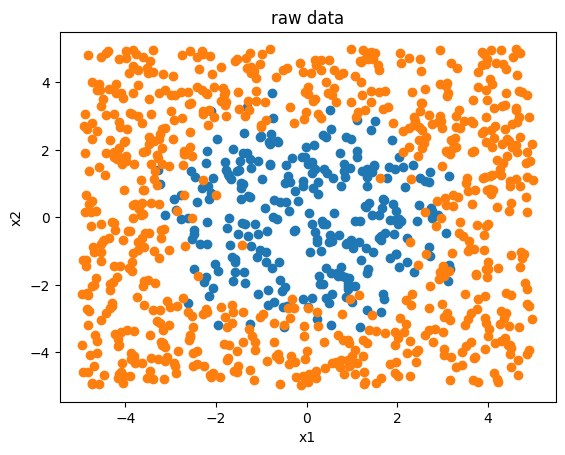

In [5]:
#visualize data
from matplotlib import pyplot as plt
fig1 = plt.figure()

plt.scatter(x.loc[:, 'x1'][y==1], x.loc[:, 'x2'][y==1])
plt.scatter(x.loc[:, 'x1'][y==0], x.loc[:, 'x2'][y==0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.show()

In [6]:
#数据分离

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(670, 2) (330, 2) (670,) (330,)


In [9]:
#建立一个 Sequential 顺序模型
from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()
#20个神经元
#输入x1\x2 为2
#激活函数 sigmoid 用于二分类
mlp.add(Dense(units=20, input_dim=2, activation='sigmoid'))

#输出层
mlp.add(Dense(units=1, activation='sigmoid'))
mlp.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
#模型参数, 二分类 用binary_crossentropy
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
mlp.fit(x_train, y_train, epochs=3000)

Epoch 1/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5131 - loss: 0.7333   
Epoch 2/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4993 - loss: 0.6827 
Epoch 3/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5685 - loss: 0.6441 
Epoch 4/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.6222 
Epoch 5/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7258 - loss: 0.6085 
Epoch 6/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.6110 
Epoch 7/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7334 - loss: 0.5899 
Epoch 8/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.5887 
Epoch 9/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.5905 
Epoch 10/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.5910 
Epoch 11/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7429 - loss: 0.5744 
Epoch 12/3000
21/21 ━━━━━━━━━━━━━━━━━━━

In [17]:
#预测 计算 准确率

#y_train_prob = mlp.predict_classes(x_train)
#print(y_train_prob)
#y_train_predict = np.argmax(y_train_prob, axis=1)
y_train_predict = mlp.predict(x_train)
y_train_predict = np.round(y_train_predict).astype(int)
#print(y_train_predict)
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_train_predict)
print('训练集准确率：', accuracy_train)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
训练集准确率： 0.9582089552238806


In [18]:
y_test_predict = mlp.predict(x_test)
y_test_predict = np.round(y_test_predict).astype(int)

accuracy_test = accuracy_score(y_test, y_test_predict)
print('测试集准确率：', accuracy_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
测试集准确率： 0.9242424242424242


In [20]:
y_train_predict_form = pd.Series(i[0] for i in y_train_predict)

In [25]:
xx, yy = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
x_range = np.c_[xx.ravel(), yy.ravel()]
y_range_predict = mlp.predict(x_range)
y_range_predict = np.round(y_range_predict).astype(int)
print(type(y_range_predict))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
<class 'numpy.ndarray'>


In [26]:
y_range_predict_form = pd.Series(i[0] for i in y_range_predict)
print(y_range_predict_form)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64


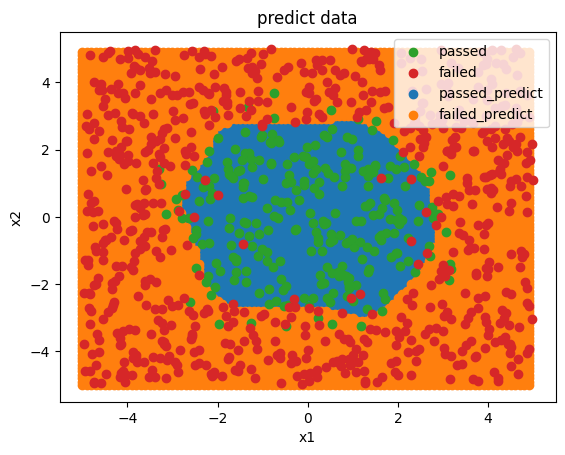

In [27]:
fig2 = plt.figure()

passed_predict = plt.scatter(x_range[:,0][y_range_predict_form==1], x_range[:,1][y_range_predict_form==1])
failed_predict = plt.scatter(x_range[:,0][y_range_predict_form==0], x_range[:,1][y_range_predict_form==0])
passed = plt.scatter(x.loc[:, 'x1'][y==1], x.loc[:, 'x2'][y==1])
failed = plt.scatter(x.loc[:, 'x1'][y==0], x.loc[:, 'x2'][y==0])
plt.legend((passed, failed, passed_predict, failed_predict), ('passed', 'failed', 'passed_predict', 'failed_predict'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('predict data')
plt.show()